In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
parent = os.path.dirname(os.path.abspath(''))
if not parent in sys.path:
    sys.path.append(parent)
from anatree.anatree_class import Anatree
import polars as pl
import matplotlib.pyplot as plt
from math import pi
from anatree.ana_tools import *
import numpy as np
from scipy.stats import binned_statistic, binned_statistic_2d
from particle import Particle

plt.rcParams.update({'font.size': 16})

In [ ]:
anatree = Anatree("/pnfs/dune/persistent/users/pgranger/anatree_new_prod/ana_tree_hd_9985.root")

Loading nu infos


100%|██████████| 3/3 [00:00<00:00, 255.08it/s]


Loading geant infos


100%|██████████| 69/69 [00:00<00:00, 352.52it/s]


Loading track infos


100%|██████████| 48/48 [00:00<00:00, 273.25it/s]


Loading shower infos


100%|██████████| 19/19 [00:00<00:00, 242.48it/s]


Loading PFP infos


100%|██████████| 12/12 [00:00<00:00, 237.73it/s]


In [ ]:
anatree.nu

run,subrun,event,nuPDG_truth,ccnc_truth,nuvtxx_truth,nuvtxy_truth,nuvtxz_truth,enu_truth,nu_dcosx_truth,nu_dcosy_truth,nu_dcosz_truth,lep_mom_truth,lep_dcosx_truth,lep_dcosy_truth,lep_dcosz_truth,mode_truth,nuWeight_truth,Q2_truth,W_truth,X_truth,Y_truth,pot,nuvtxx,nuvtxy,nuvtxz
i32,i32,i32,i32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i32,f32,f32,f32,f32,f32,f64,f64,f64,f64
74257901,1,37301,16,1,189.074905,391.651642,971.497986,0.404192,-0.974312,-0.224437,0.018875,0.201034,-0.471616,-0.424738,-0.772772,10,5.083642e7,0.074718,1.090114,0.195855,0.502628,-99999.0,188.999939,391.579468,971.729553
74257901,1,37302,14,0,-169.67244,89.491035,993.040161,0.9619,-0.512889,0.612213,-0.601787,0.877154,-0.751254,0.002954,-0.660007,0,4.1584396e7,0.365025,0.814724,2.479254,0.081511,-99999.0,-169.141968,89.649063,993.177063
74257901,1,37303,12,0,349.415558,196.321152,110.55912,0.199197,0.70029,-0.713825,0.00741,0.158416,0.76571,0.189367,0.614677,0,2.728728e7,0.037514,0.959496,0.489874,0.204725,-99999.0,349.712891,196.18486,110.466873
74257901,1,37304,16,0,-86.648773,-349.869568,1185.304321,6.229745,-0.527906,-0.842081,-0.110536,5.588196,-0.461339,-0.867479,-0.186138,0,3.3605856e7,0.653444,0.956633,0.951125,0.058728,-99999.0,-86.925934,-350.270996,1185.244507
74257901,1,37305,14,1,247.987534,-376.598969,1251.134521,0.884568,-0.346359,-0.187128,-0.919255,0.299985,0.230132,-0.139648,-0.963088,1,5.8351044e7,0.089303,1.374779,0.081351,0.660869,-99999.0,247.967163,-376.956207,1251.042114
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
74257901,1,37396,14,1,189.437943,100.093079,1123.268066,26.528118,0.391239,0.574965,0.718579,1.1818,0.733864,0.047115,0.67766,2,1.9581024e7,12.473527,6.000359,0.262069,0.955451,-99999.0,189.53476,100.081963,1123.195312
74257901,1,37397,14,1,85.354332,-184.970856,598.772766,4.177355,0.133397,0.461424,0.877099,1.275039,0.568618,0.376435,0.731417,2,4.3667684e7,1.160523,2.27401,0.212937,0.694774,-99999.0,83.307915,-178.94455,609.402771
74257901,1,37398,-12,1,-348.369141,-89.7043,471.265778,8.788091,0.19913,-0.508471,-0.837743,8.170972,0.25612,-0.537593,-0.803366,1,3.3092408e7,0.379035,1.288946,0.327079,0.070222,-99999.0,-348.285065,-89.726418,471.076569


In [ ]:
anatree.geant

run,subrun,event,pdg_geant,status_geant,Mass_geant,Eng_geant,EndE_geant,Px_geant,Py_geant,Pz_geant,P_geant,StartPointx_geant,StartPointy_geant,StartPointz_geant,StartT_geant,EndPointx_geant,EndPointy_geant,EndPointz_geant,EndT_geant,theta_geant,phi_geant,theta_xz_geant,theta_yz_geant,pathlen_geant,inTPCActive_geant,StartPointx_tpcAV_geant,StartPointy_tpcAV_geant,StartPointz_tpcAV_geant,StartT_tpcAV_geant,StartE_tpcAV_geant,StartP_tpcAV_geant,StartPx_tpcAV_geant,StartPy_tpcAV_geant,StartPz_tpcAV_geant,EndPointx_tpcAV_geant,EndPointy_tpcAV_geant,EndPointz_tpcAV_geant,EndT_tpcAV_geant,EndE_tpcAV_geant,EndP_tpcAV_geant,EndPx_tpcAV_geant,EndPy_tpcAV_geant,EndPz_tpcAV_geant,pathlen_drifted_geant,inTPCDrifted_geant,StartPointx_drifted_geant,StartPointy_drifted_geant,StartPointz_drifted_geant,StartT_drifted_geant,StartE_drifted_geant,StartP_drifted_geant,StartPx_drifted_geant,StartPy_drifted_geant,StartPz_drifted_geant,EndPointx_drifted_geant,EndPointy_drifted_geant,EndPointz_drifted_geant,EndT_drifted_geant,EndE_drifted_geant,EndP_drifted_geant,EndPx_drifted_geant,EndPy_drifted_geant,EndPz_drifted_geant,NumberDaughters_geant,Mother_geant,TrackId_geant,MergedId_geant,origin_geant,MCTruthIndex_geant,process_primary_geant,processname_geant
i32,i32,i32,i32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i32,i32,i32,i32,i32,i32,i32,str
74257901,1,37301,16,1,0.0,0.201034,0.201034,-0.094811,-0.085387,-0.155353,0.201034,189.074905,391.651642,971.497986,0.0,-2938.506592,-2425.054443,-4153.240234,221.207428,2.453993,-2.408445,-2.593641,-2.639034,1171.400757,1,189.074905,391.651642,971.497986,0.0,0.201034,0.201034,-0.094811,-0.085387,-0.155353,-363.376038,-105.886787,66.27253,39.073723,0.201034,0.201034,-0.094811,-0.085387,-0.155353,1171.397827,1,189.074905,391.651642,971.497986,0.0,0.201034,0.201034,-0.094811,-0.085387,-0.155353,-363.369781,-105.886787,66.27253,0.0,0.201034,0.201034,-0.094811,-0.085387,-0.155353,0,0,1,0,1,0,1,"""primary"""
74257901,1,37301,2212,1,0.938272,0.950541,0.938272,-0.070422,-0.117861,-0.065748,0.152228,189.074905,391.651642,971.497986,0.0,188.988281,391.499664,971.41449,0.052393,2.017404,-2.109372,-2.32189,-2.079644,0.193868,1,189.074905,391.651642,971.497986,0.0,0.950541,0.152228,-0.070422,-0.117861,-0.065748,188.988281,391.499664,971.41449,0.052393,0.938272,0.0,-0.0,-0.0,-0.0,0.193864,1,189.074905,391.651642,971.497986,0.0,0.950541,0.152228,-0.070422,-0.117861,-0.065748,188.988281,391.499664,971.41449,0.0,0.938272,0.0,-0.0,-0.0,-0.0,0,0,2,0,1,0,1,"""primary"""
74257901,1,37301,2212,1,0.938272,0.949328,0.938272,0.048587,-0.08203,-0.108533,0.144461,189.074905,391.651642,971.497986,0.0,189.121582,391.560852,971.375549,0.044938,2.420816,-1.036057,2.720679,-2.494381,0.159431,1,189.074905,391.651642,971.497986,0.0,0.949328,0.144461,0.048587,-0.08203,-0.108533,189.121582,391.560852,971.375549,0.044938,0.938272,0.0,-0.0,0.0,-0.0,0.159433,1,189.074905,391.651642,971.497986,0.0,0.949328,0.144461,0.048587,-0.08203,-0.108533,189.121597,391.560852,971.375549,0.0,0.938272,0.0,-0.0,0.0,-0.0,0,0,3,0,1,0,1,"""primary"""
74257901,1,37301,2212,1,0.938272,0.938951,0.938272,0.009096,0.011458,-0.032559,0.035695,189.074905,391.651642,971.497986,0.0,189.075348,391.652222,971.496399,0.001535,2.719295,0.899826,2.869168,2.803204,0.001749,1,189.074905,391.651642,971.497986,0.0,0.938951,0.035695,0.009096,0.011458,-0.032559,189.075348,391.652222,971.496399,0.001535,0.938272,0.0,0.0,0.0,-0.0,0.001749,1,189.074905,391.651642,971.497986,0.0,0.938951,0.035695,0.009096,0.011458,-0.032559,189.075348,391.652222,971.496399,0.0,0.938272,0.0,0.0,0.0,-0.0,0,0,4,0,1,0,1,"""primary"""
74257901,1,37301,2212,1,0.938272,0.944602,0.938272,-0.080999,0.047072,0.05605,0.109171,189.074905,391.651642,971.497986,0.0,189.029099,391.679352,971.529968,0.022433,1.031634,2.615154,-0.9

In [ ]:
anatree.pfp

run,subrun,event,pfp_selfID,pfp_isPrimary,pfp_numDaughters,pfp_parentID,pfp_vertexID,pfp_isShower,pfp_trackScore,pfp_isTrack,pfp_trackID,pfp_showerID,pfp_pdgCode,pfp_isNeutrino
i32,i32,i32,i16,i16,i16,i16,i16,i16,f32,i16,i16,i16,i32,i16
74257901,1,37301,0,0,0,1,0,0,0.519538,1,0,-9999,13,0
74257901,1,37301,1,1,1,-1,1,0,-9999.0,0,-9999,-9999,14,1
74257901,1,37302,0,0,0,1,0,0,0.700245,1,0,-9999,13,0
74257901,1,37302,1,1,1,-1,1,0,-9999.0,0,-9999,-9999,14,1
74257901,1,37303,0,0,0,1,0,1,0.468598,0,0,-999,11,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
74257901,1,37399,1,0,0,3,1,1,0.431766,0,1,-999,11,0
74257901,1,37399,2,0,0,3,2,0,0.564717,1,2,-9999,13,0
74257901,1,37399,3,1,3,-1,3,0,-9999.0,0,-9999,-9999,12,1


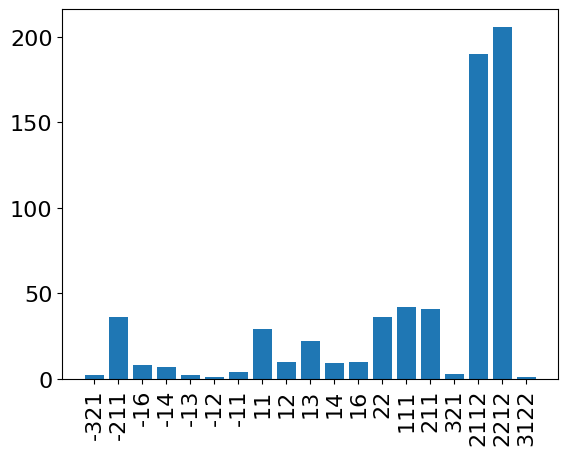

In [7]:
pdg, count = np.unique(anatree.geant['pdg_geant'], return_counts=True)
pdg = [str(p) for p in pdg]
plt.bar(pdg, count)
plt.xticks(rotation=90)
print()